In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# More Dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [5]:
# Create Engine

engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# Translate DB into Engine

base = automap_base()

# Tables

base.prepare(engine,reflect=True)

In [9]:
# View the Classes

base.classes.keys()

['measurement', 'station']

In [10]:
# Save the Results

measurement = base.classes.measurement
station = base.classes.station

In [11]:
# Create Session

session = Session(engine)

In [13]:
# Most Recent Date

recent_date = session.query(func.max(measurement.date)).first()
recent_date

('2017-08-23')

In [19]:
# Build Query for the past year's precipitation data

# Latest Date T-Minus 1 Year

one_year_back = dt.date(2017,8,23) - dt.timedelta(days=365)

one_year_back


datetime.date(2016, 8, 23)

In [25]:
# Retrieve Precipitation Score

prec_score = session.query(measurement.date, measurement.prcp).filter(measurement.date>= one_year_back).all()

#prec_score

In [34]:
# Put into DF

prec_df = pd.DataFrame(prec_score, columns=['date','precipitation'])

df = prec_df.sort_values("date")

df.head()

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


Text(0, 0.5, 'Inches')

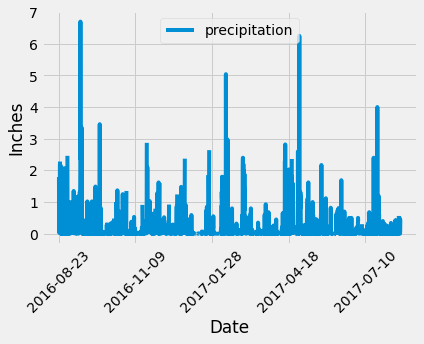

In [35]:
# Plot
df.plot(x="date",y="precipitation",rot=45)
plt.xlabel("Date")
plt.ylabel("Inches")

In [36]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [37]:
# Calculate # of Stations

session.query(func.count(station.station)).all()

[(9)]

In [39]:
# Most Active Stations? - List in descending order

session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Find Low/High/Avg. Temp for the most active Station

session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [45]:
# Query last year

from pandas.plotting import table

one_year_back = dt.date(2017,8,23) - dt.timedelta(days=365)

output = session.query(measurement.tobs).\
filter(measurement.station == 'USC00519281').\
filter(measurement.date >= one_year_back).all()

station_df = pd.DataFrame(output,columns=['tobs'])

station_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


Text(0.5, -1.340000000000014, 'Temp (F)')

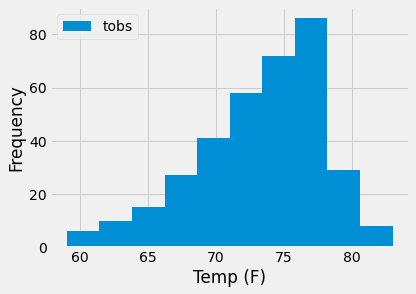

In [50]:
# Plot

station_df.plot.hist(bins=10)
plt.tight_layout()
plt.xlabel("Temp (F)")

In [51]:
session.close()